In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 查看当前目录
os.getcwd()

'd:\\Projects\\Codes\\sichuan\\gr'

In [4]:
# 切换工作目录
# os.chdir('/home/maveray/Codes/sichuan/gr')
os.getcwd()

'd:\\Projects\\Codes\\sichuan\\gr'

In [5]:
# 解压数据集
if not os.path.exists("dataset"):
    !unzip ../zqy/dataset/2024年四川省大学生数据科学与统计建模竞赛.zip

In [6]:
# 重命名文件夹
!mv 2024年四川省大学生数据科学与统计建模竞赛 dataset
# 配置数据集路径
train_folder = './dataset/训练集'
test_folder = './dataset/测试集'
train_csv = os.path.join(train_folder, 'train_data.csv')
test_csv = os.path.join(test_folder, 'test_data.csv')
train_target = os.path.join(train_folder, 'train_target.csv')

'mv' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [7]:
# 读取数据
train_data = pd.read_csv(train_csv)
train_target = pd.read_csv(train_target)
test_data = pd.read_csv(test_csv)

### 数据说明

特征：数据包括客户基本信息类（x0-x20），征信数据-历史金融借贷类（x20-x256）、征信数据-其他行为类（x256-x3805）

风险标签：客户在授信后是否发生逾期，其中y=1代表逾期，y=0代表未逾期。

时间变量：变量date记录了客户的授信所属的阶段。

样本量：总计8万，其中训练集数据量6.2万，测试集数据量1.8万。训练集正样本（y=1）约占比18%。测试集正样本占比11%。

说明：相关数据经过脱敏，分层抽样、模拟转换等处理，不涉及客户隐私，不反映金融机构真实业务数据指标。


In [8]:
# 定义数据特征组
columns = train_data.columns
feature_groups = [columns[1:21], columns[21:257], columns[257:]]
print([len(g) for g in feature_groups])

[20, 236, 3550]


#### 数据缺失情况

In [29]:
# 计算缺失数据比例
missing_ratio_g1 = train_data[feature_groups[0]].isnull().sum() / len(train_data)
missing_ratio_g2 = train_data[feature_groups[1]].isnull().sum() / len(train_data)
missing_ratio_g3 = train_data[feature_groups[2]].isnull().sum() / len(train_data)

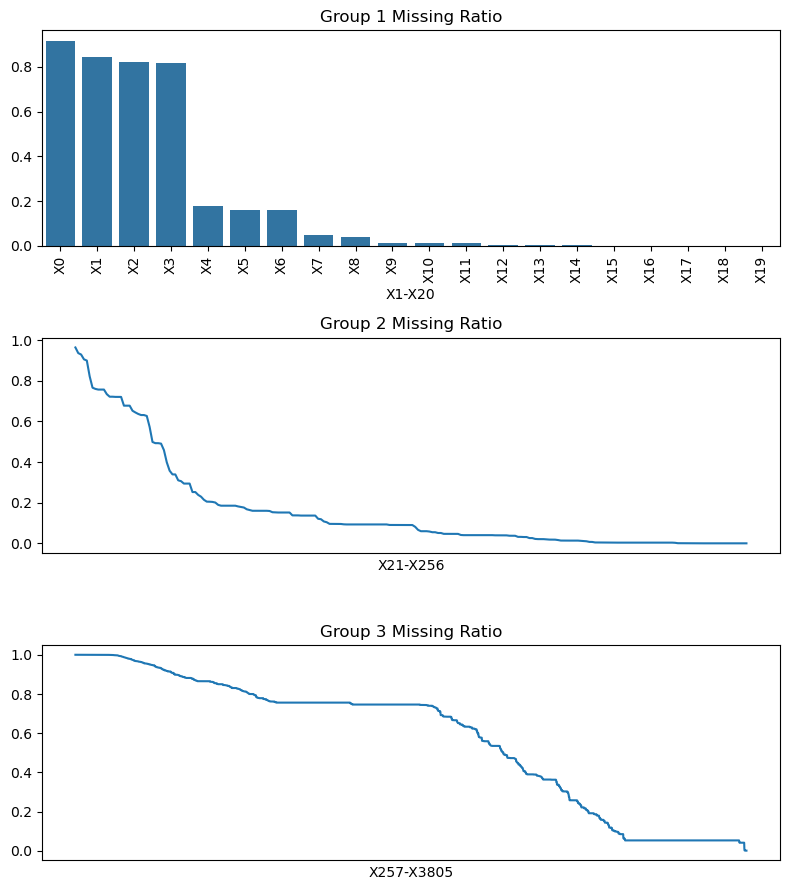

<Figure size 640x480 with 0 Axes>

In [11]:
# 将缺失比例绘图
plt.figure(figsize=(8, 9))
plt.subplot(3, 1, 1)
sns.barplot(missing_ratio_g1.values)
plt.title('Group 1 Missing Ratio')
plt.xticks(range(len(feature_groups[0])), [f'X{i}' for i in range(len(feature_groups[0]))], rotation=90)
plt.xlabel('X1-X20')
plt.tight_layout()

plt.subplot(3, 1, 2)
plt.plot(missing_ratio_g2.values)
plt.title('Group 2 Missing Ratio')
plt.xticks([])
plt.xlabel('X21-X256')
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(missing_ratio_g3.values)
plt.title('Group 3 Missing Ratio')
plt.xticks([])
plt.xlabel('X257-X3805')
plt.tight_layout()

plt.savefig('./imgs/missing_ratio.png')
plt.show()

In [30]:
# 对缺失比例进行排序
missing_ratio_g1 = missing_ratio_g1.sort_values(ascending=False)
missing_ratio_g2 = missing_ratio_g2.sort_values(ascending=False)
missing_ratio_g3 = missing_ratio_g3.sort_values(ascending=False)

In [31]:
# 计算所有数据实例在全部特征上的缺失比例
idx = train_data.index
missing_ratio_instances = train_data.loc[idx, train_data.columns[1:]].isnull().sum(axis=1) / train_data.shape[1]
missing_ratio_instances = missing_ratio_instances.sort_values(ascending=False)
# 计算所有数据实例在特征组1上的缺失比例
missing_ratio_instances_g1 = train_data.loc[idx, feature_groups[0]].isnull().sum(axis=1) / train_data[feature_groups[0]].shape[1]
missing_ratio_instances_g1 = missing_ratio_instances_g1.sort_values(ascending=False)
# 计算所有数据实例在特征组2上的缺失比例
missing_ratio_instances_g2 = train_data.loc[idx, feature_groups[1]].isnull().sum(axis=1) / train_data[feature_groups[1]].shape[1]
missing_ratio_instances_g2 = missing_ratio_instances_g2.sort_values(ascending=False)
# 计算所有数据实例在特征组3上的缺失比例
missing_ratio_instances_g3 = train_data.loc[idx, feature_groups[2]].isnull().sum(axis=1) / train_data[feature_groups[2]].shape[1]
missing_ratio_instances_g3 = missing_ratio_instances_g3.sort_values(ascending=False)

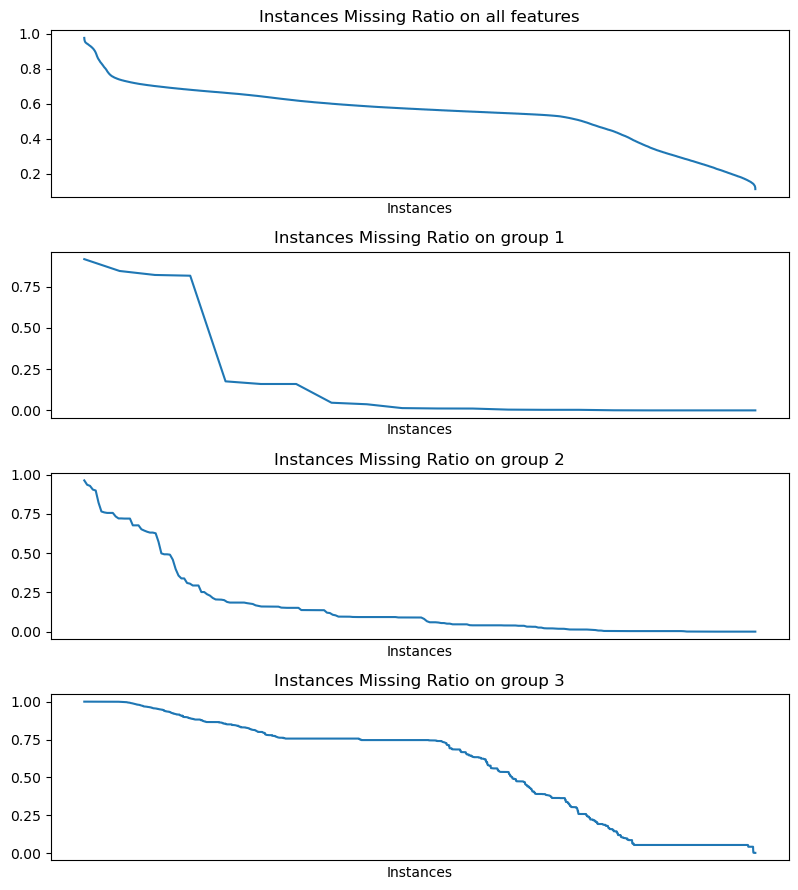

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(8, 9))

plt.subplot(4, 1, 1)
plt.plot(missing_ratio_instances.values)
plt.title('Instances Missing Ratio on all features')
plt.xticks([])
plt.xlabel('Instances')
plt.tight_layout()

plt.subplot(4, 1, 2)
plt.plot(missing_ratio_g1.values)
plt.title('Instances Missing Ratio on group 1')
plt.xticks([])
plt.xlabel('Instances')
plt.tight_layout()

plt.subplot(4, 1, 3)
plt.plot(missing_ratio_g2.values)
plt.title('Instances Missing Ratio on group 2')
plt.xticks([])
plt.xlabel('Instances')
plt.tight_layout()

plt.subplot(4, 1, 4)
plt.plot(missing_ratio_g3.values)
plt.title('Instances Missing Ratio on group 3')
plt.xticks([])
plt.xlabel('Instances')
plt.tight_layout()

plt.savefig('./imgs/missing_ratio_instances.png')
plt.show()

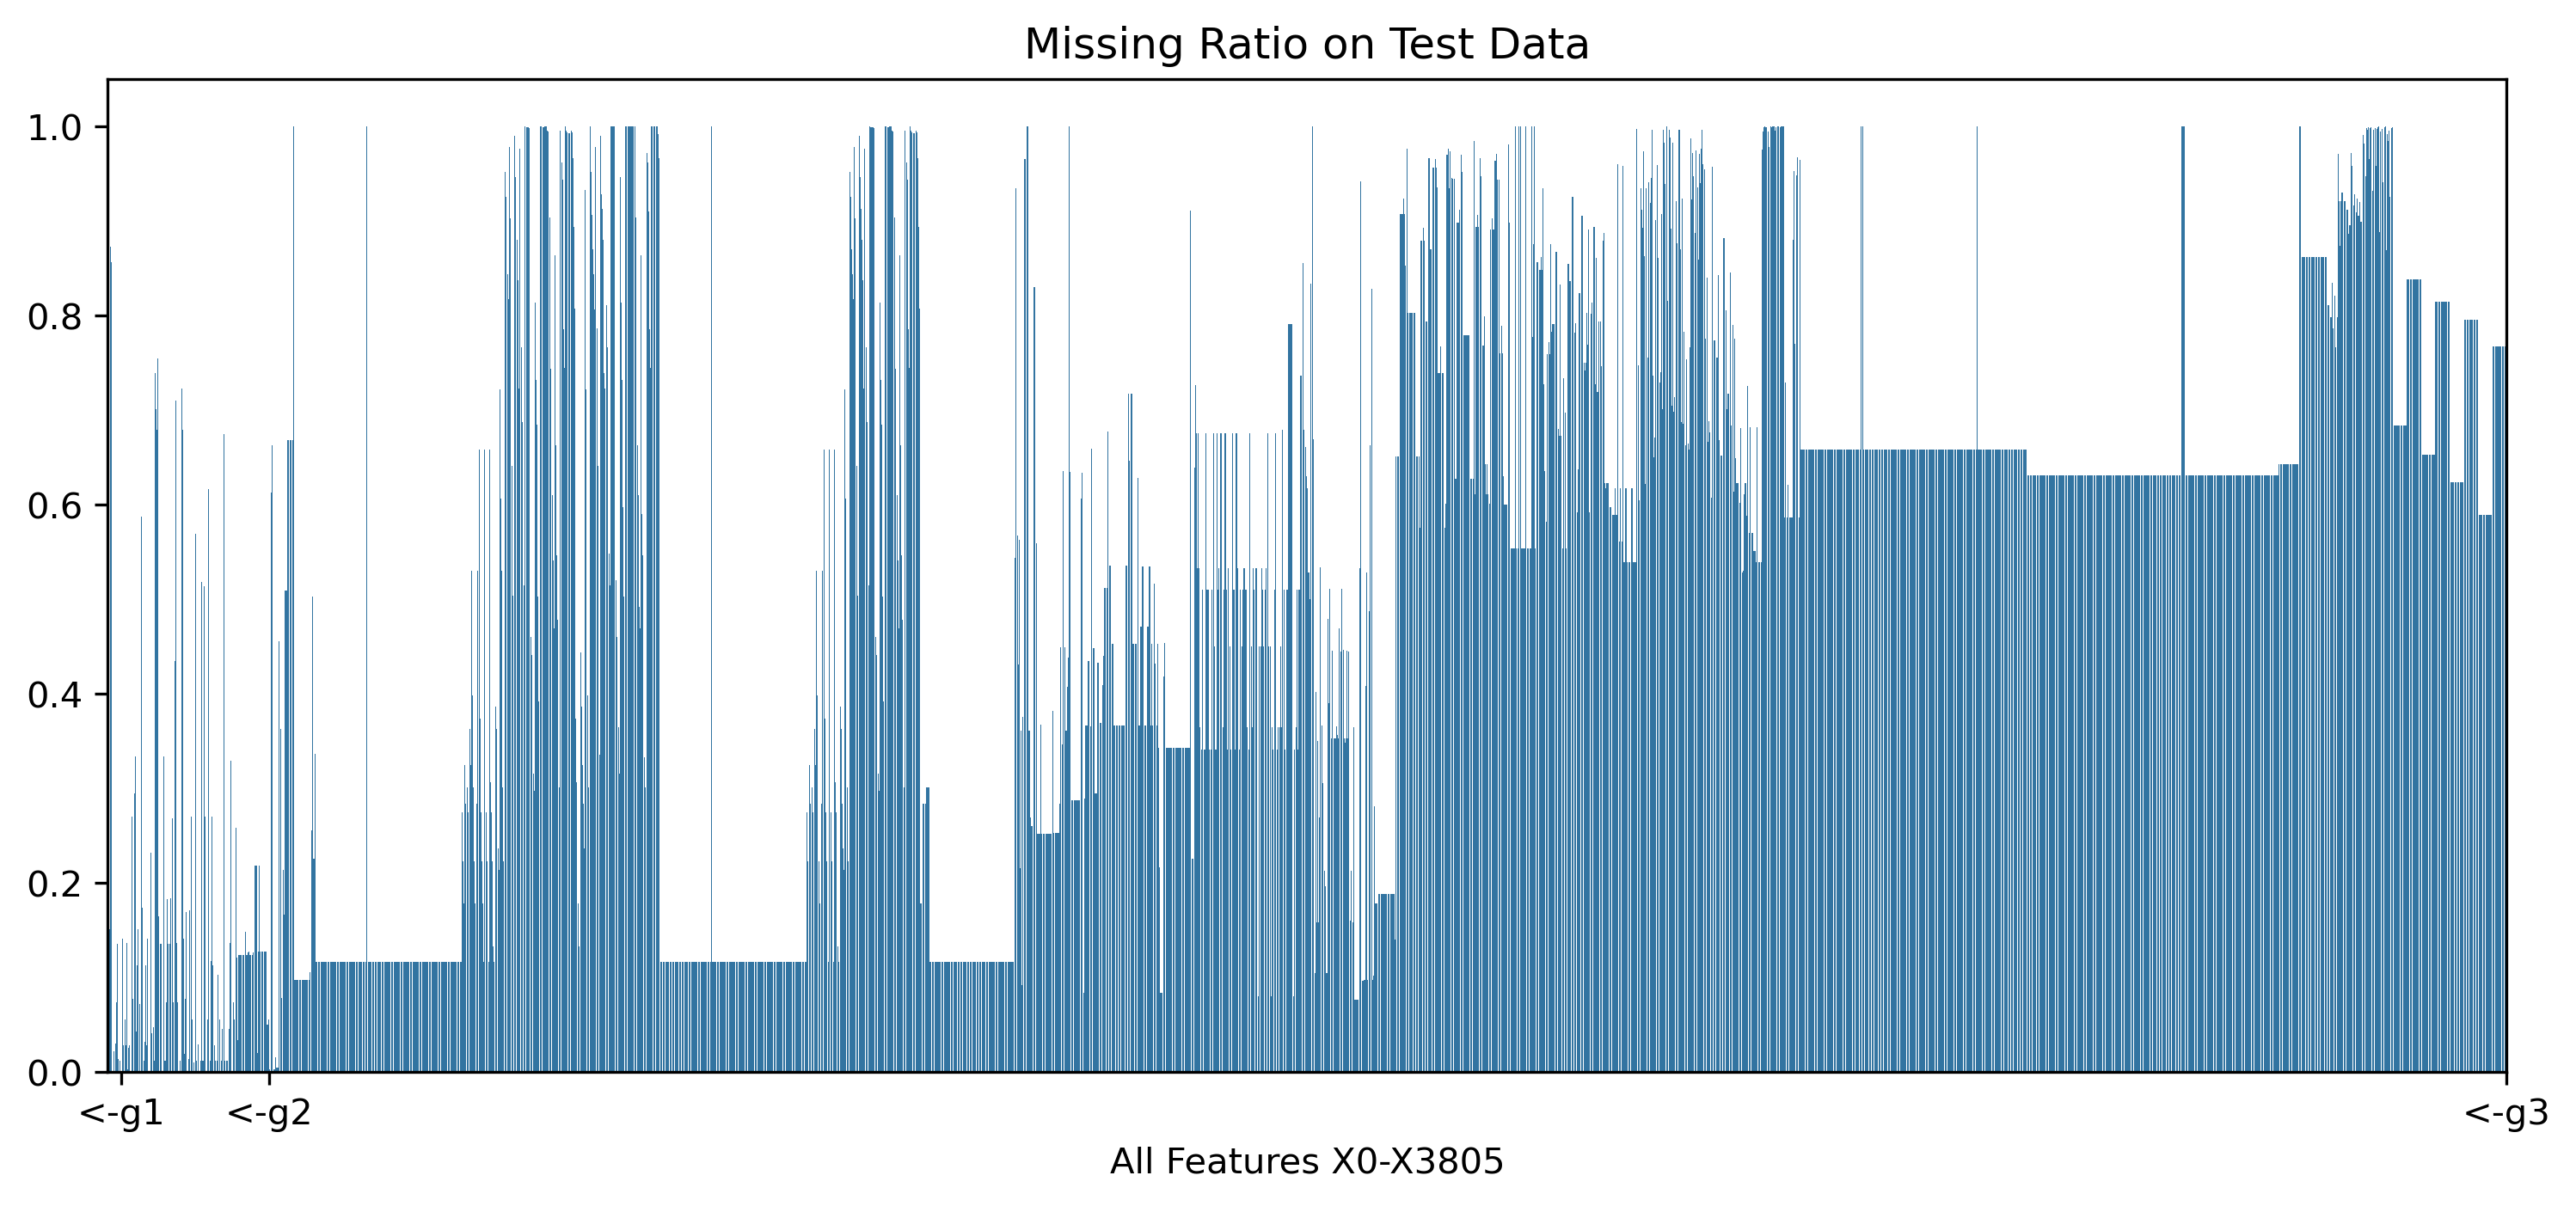

In [15]:
# 测试集数据缺失情况
missing_ratio_test = test_data[test_data.columns[1:]].isnull().sum() / len(test_data)
# missing_ratio_test = missing_ratio_test.sort_values(ascending=False)

plt.figure(figsize=(12, 5), dpi=300)
sns.barplot(x=range(len(missing_ratio_test)), y=missing_ratio_test.values)
plt.title('Missing Ratio on Test Data')
plt.xticks([21, 256, 3805], ['<-g1', '<-g2', '<-g3'])
plt.xlabel('All Features X0-X3805')

plt.show()

#### 数据分布

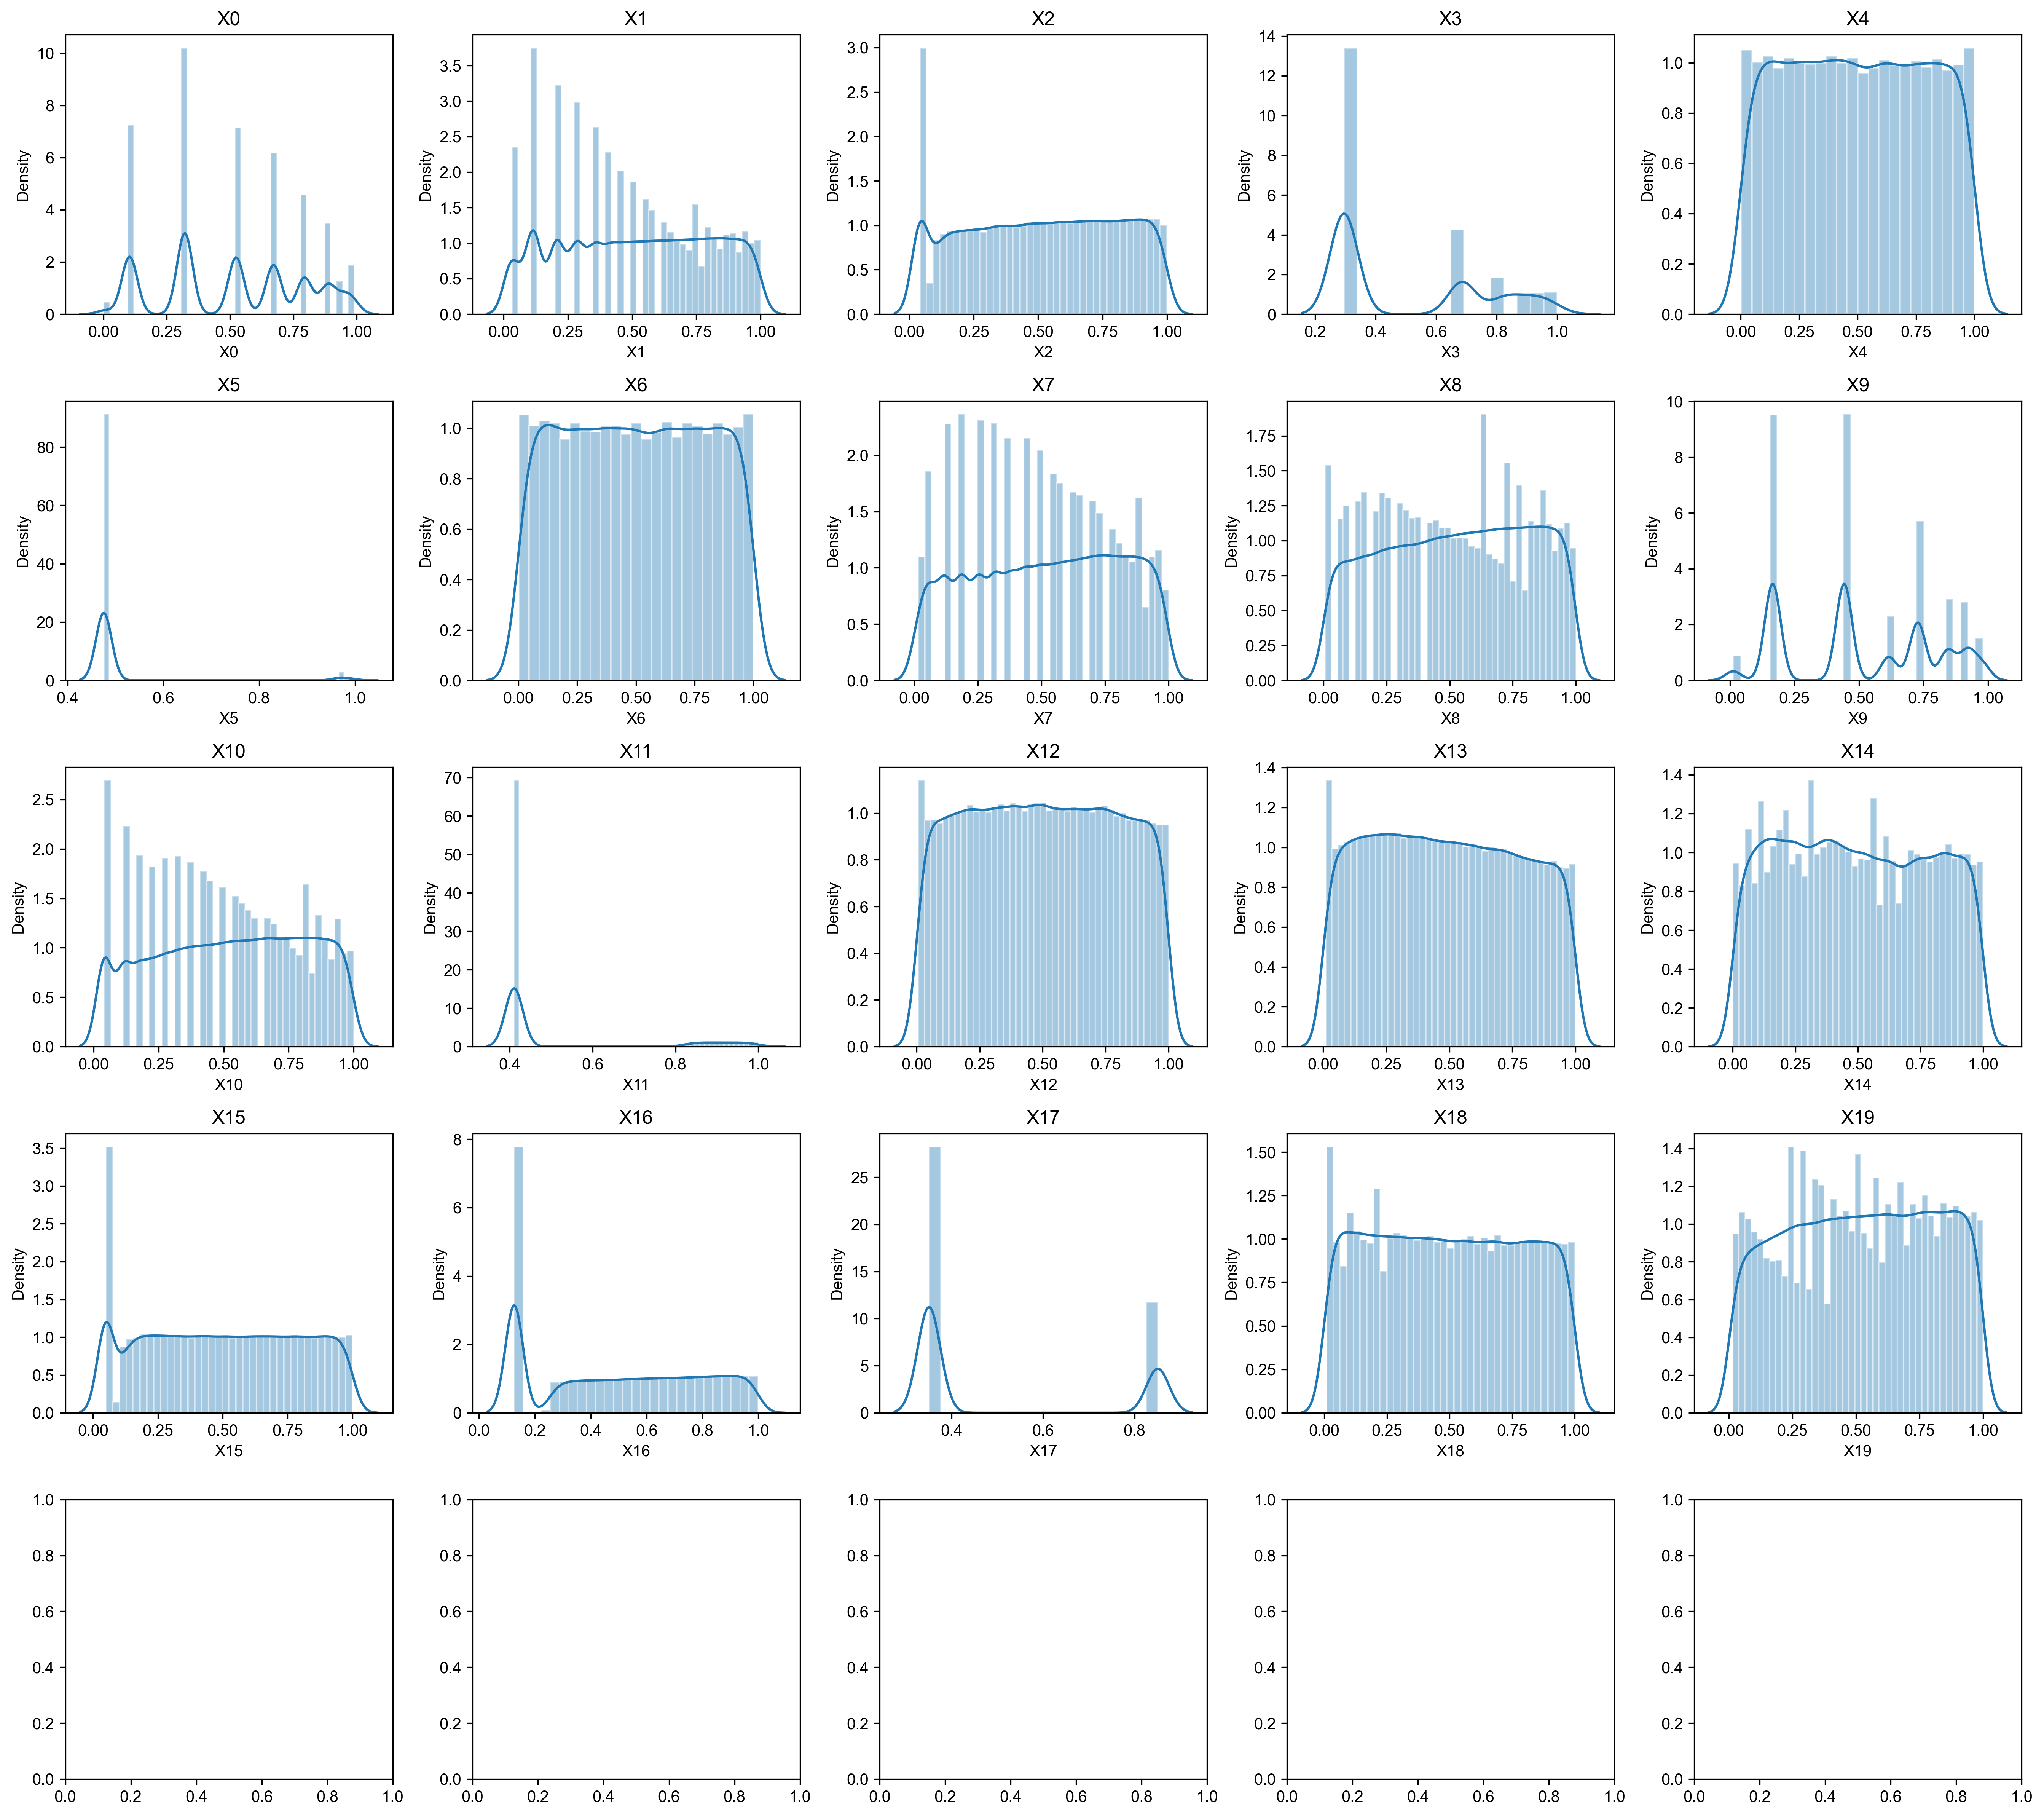

In [16]:
# 绘制g1的特征分布

fig, axs = plt.subplots(4, 5, figsize=(18, 16), dpi=300)

# 在每个子图中绘制一个图
sns.set_style("whitegrid")
for i in range(len(feature_groups[0])):
    sns.distplot(train_data[feature_groups[0]].iloc[:, i], ax=axs[i // 5, i % 5])
    axs[i // 5, i % 5].set_title(f'X{i}')
    plt.tight_layout()

# 显示图
plt.show()

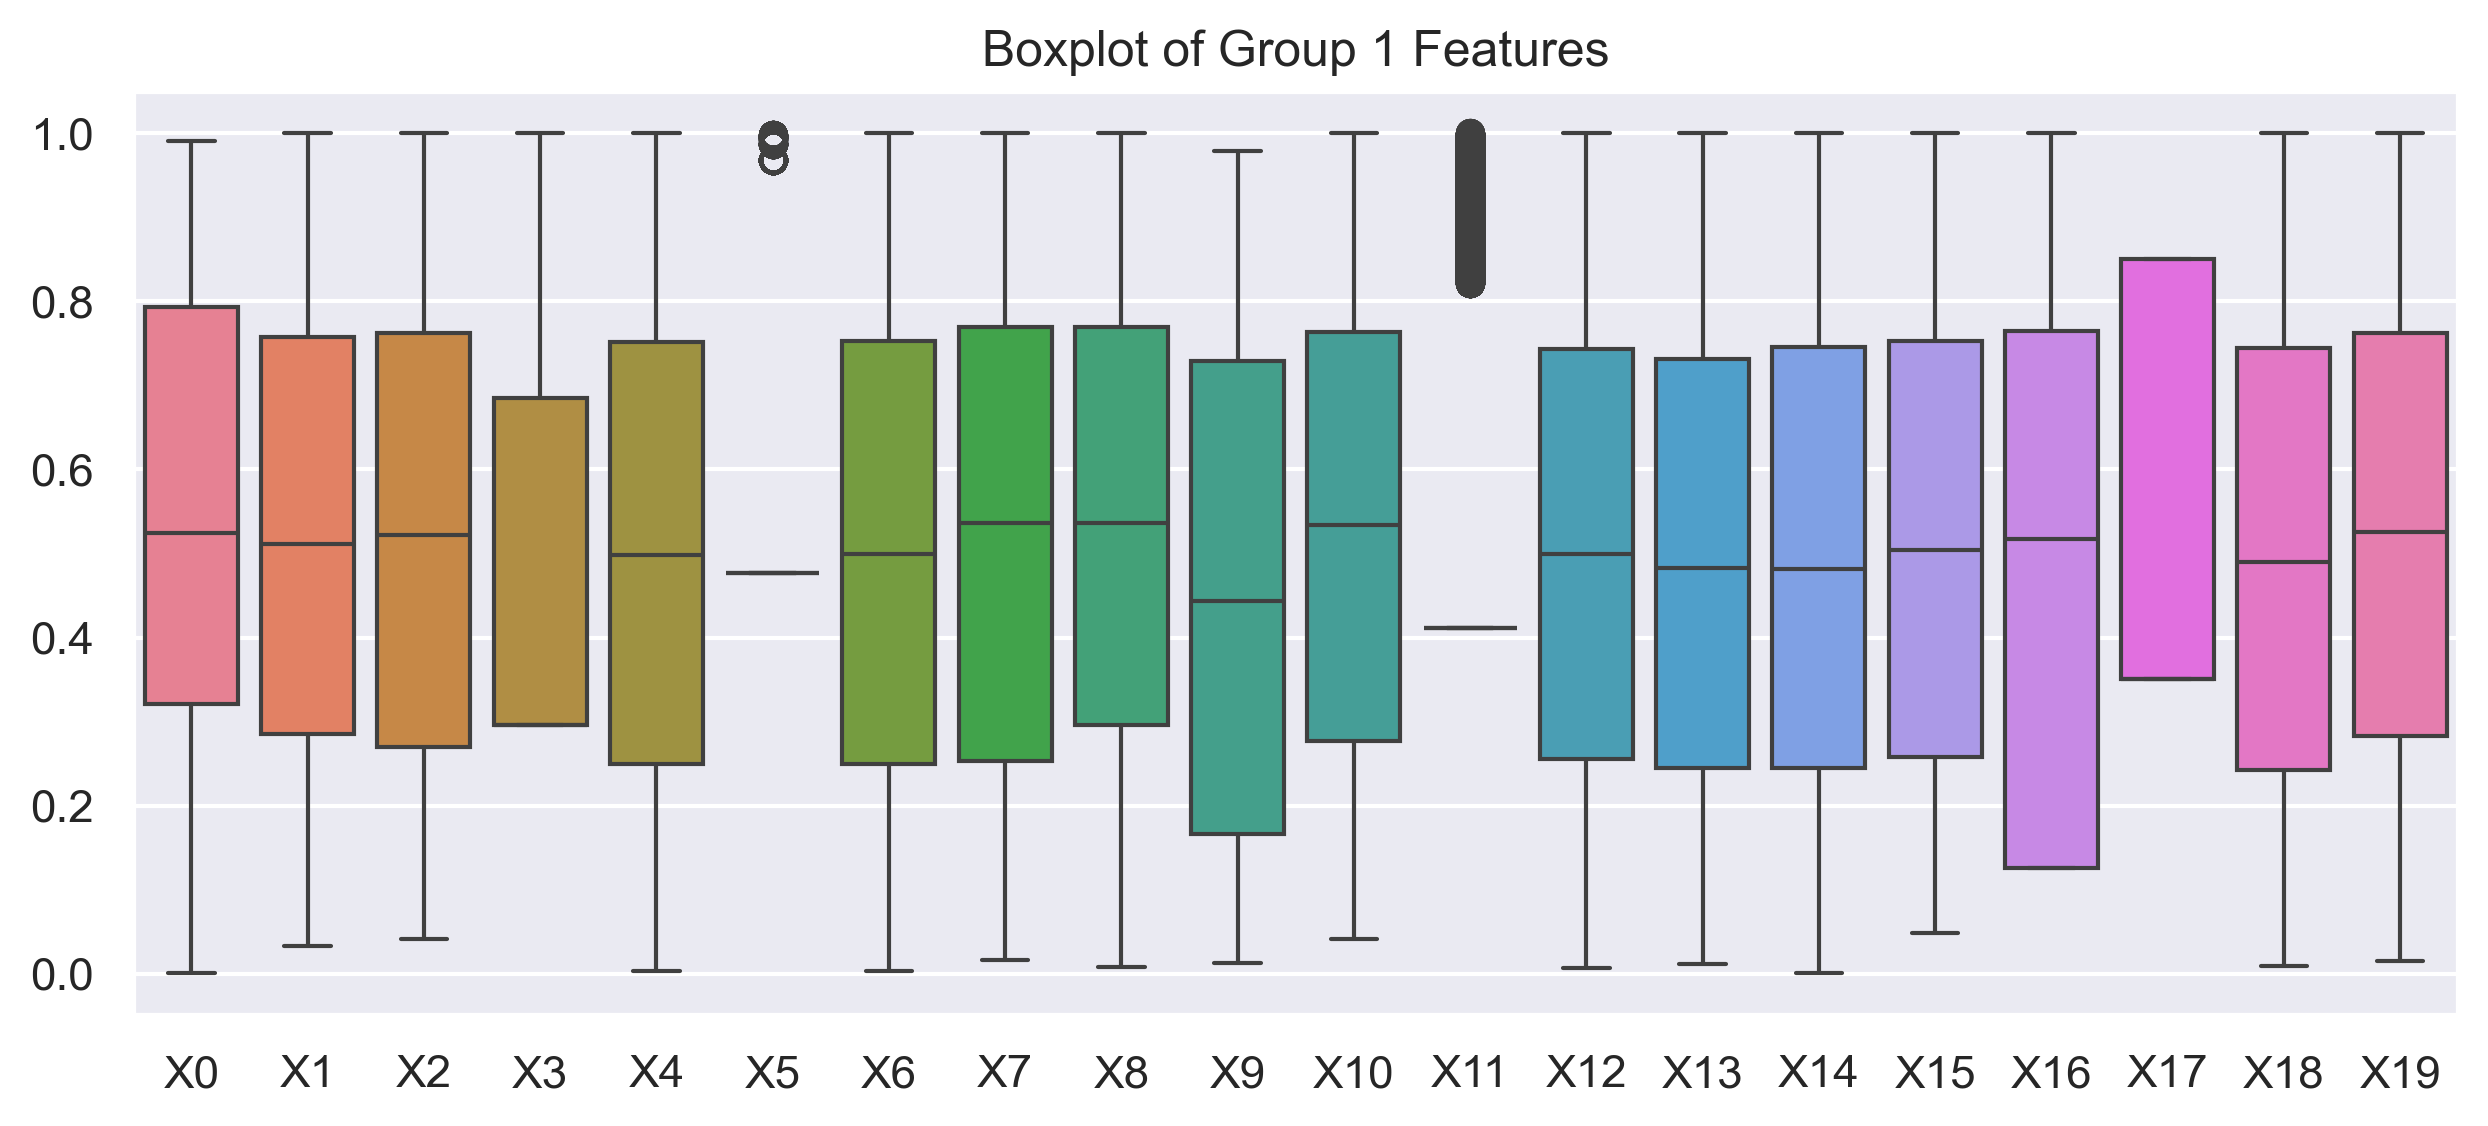

In [73]:
# g1的特征箱线图
plt.figure(figsize=(10, 4), dpi=300)
sns.boxplot(train_data[feature_groups[0]])
plt.title('Boxplot of Group 1 Features')
plt.show()

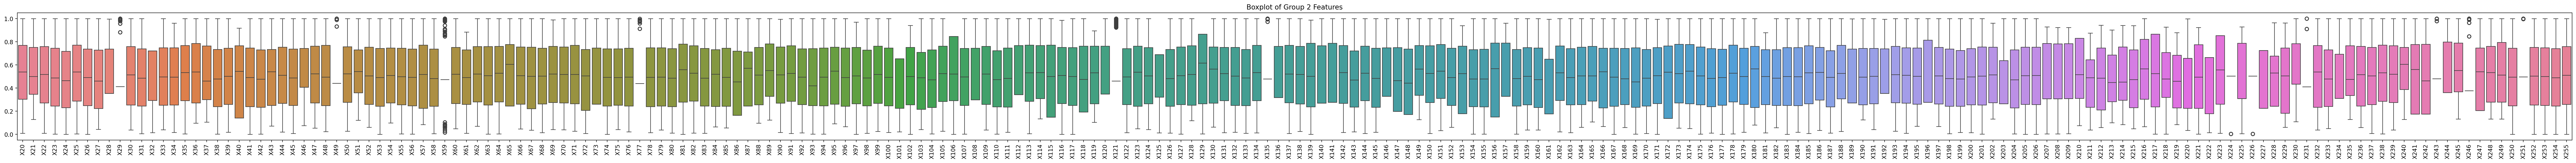

In [13]:
# g2特征的箱线图
plt.figure(figsize=(80, 4), dpi=200)
sns.boxplot(train_data[feature_groups[1]])
plt.title('Boxplot of Group 2 Features')
plt.xticks(rotation=90)
plt.savefig('./imgs/boxplot_g2.png')
plt.show()

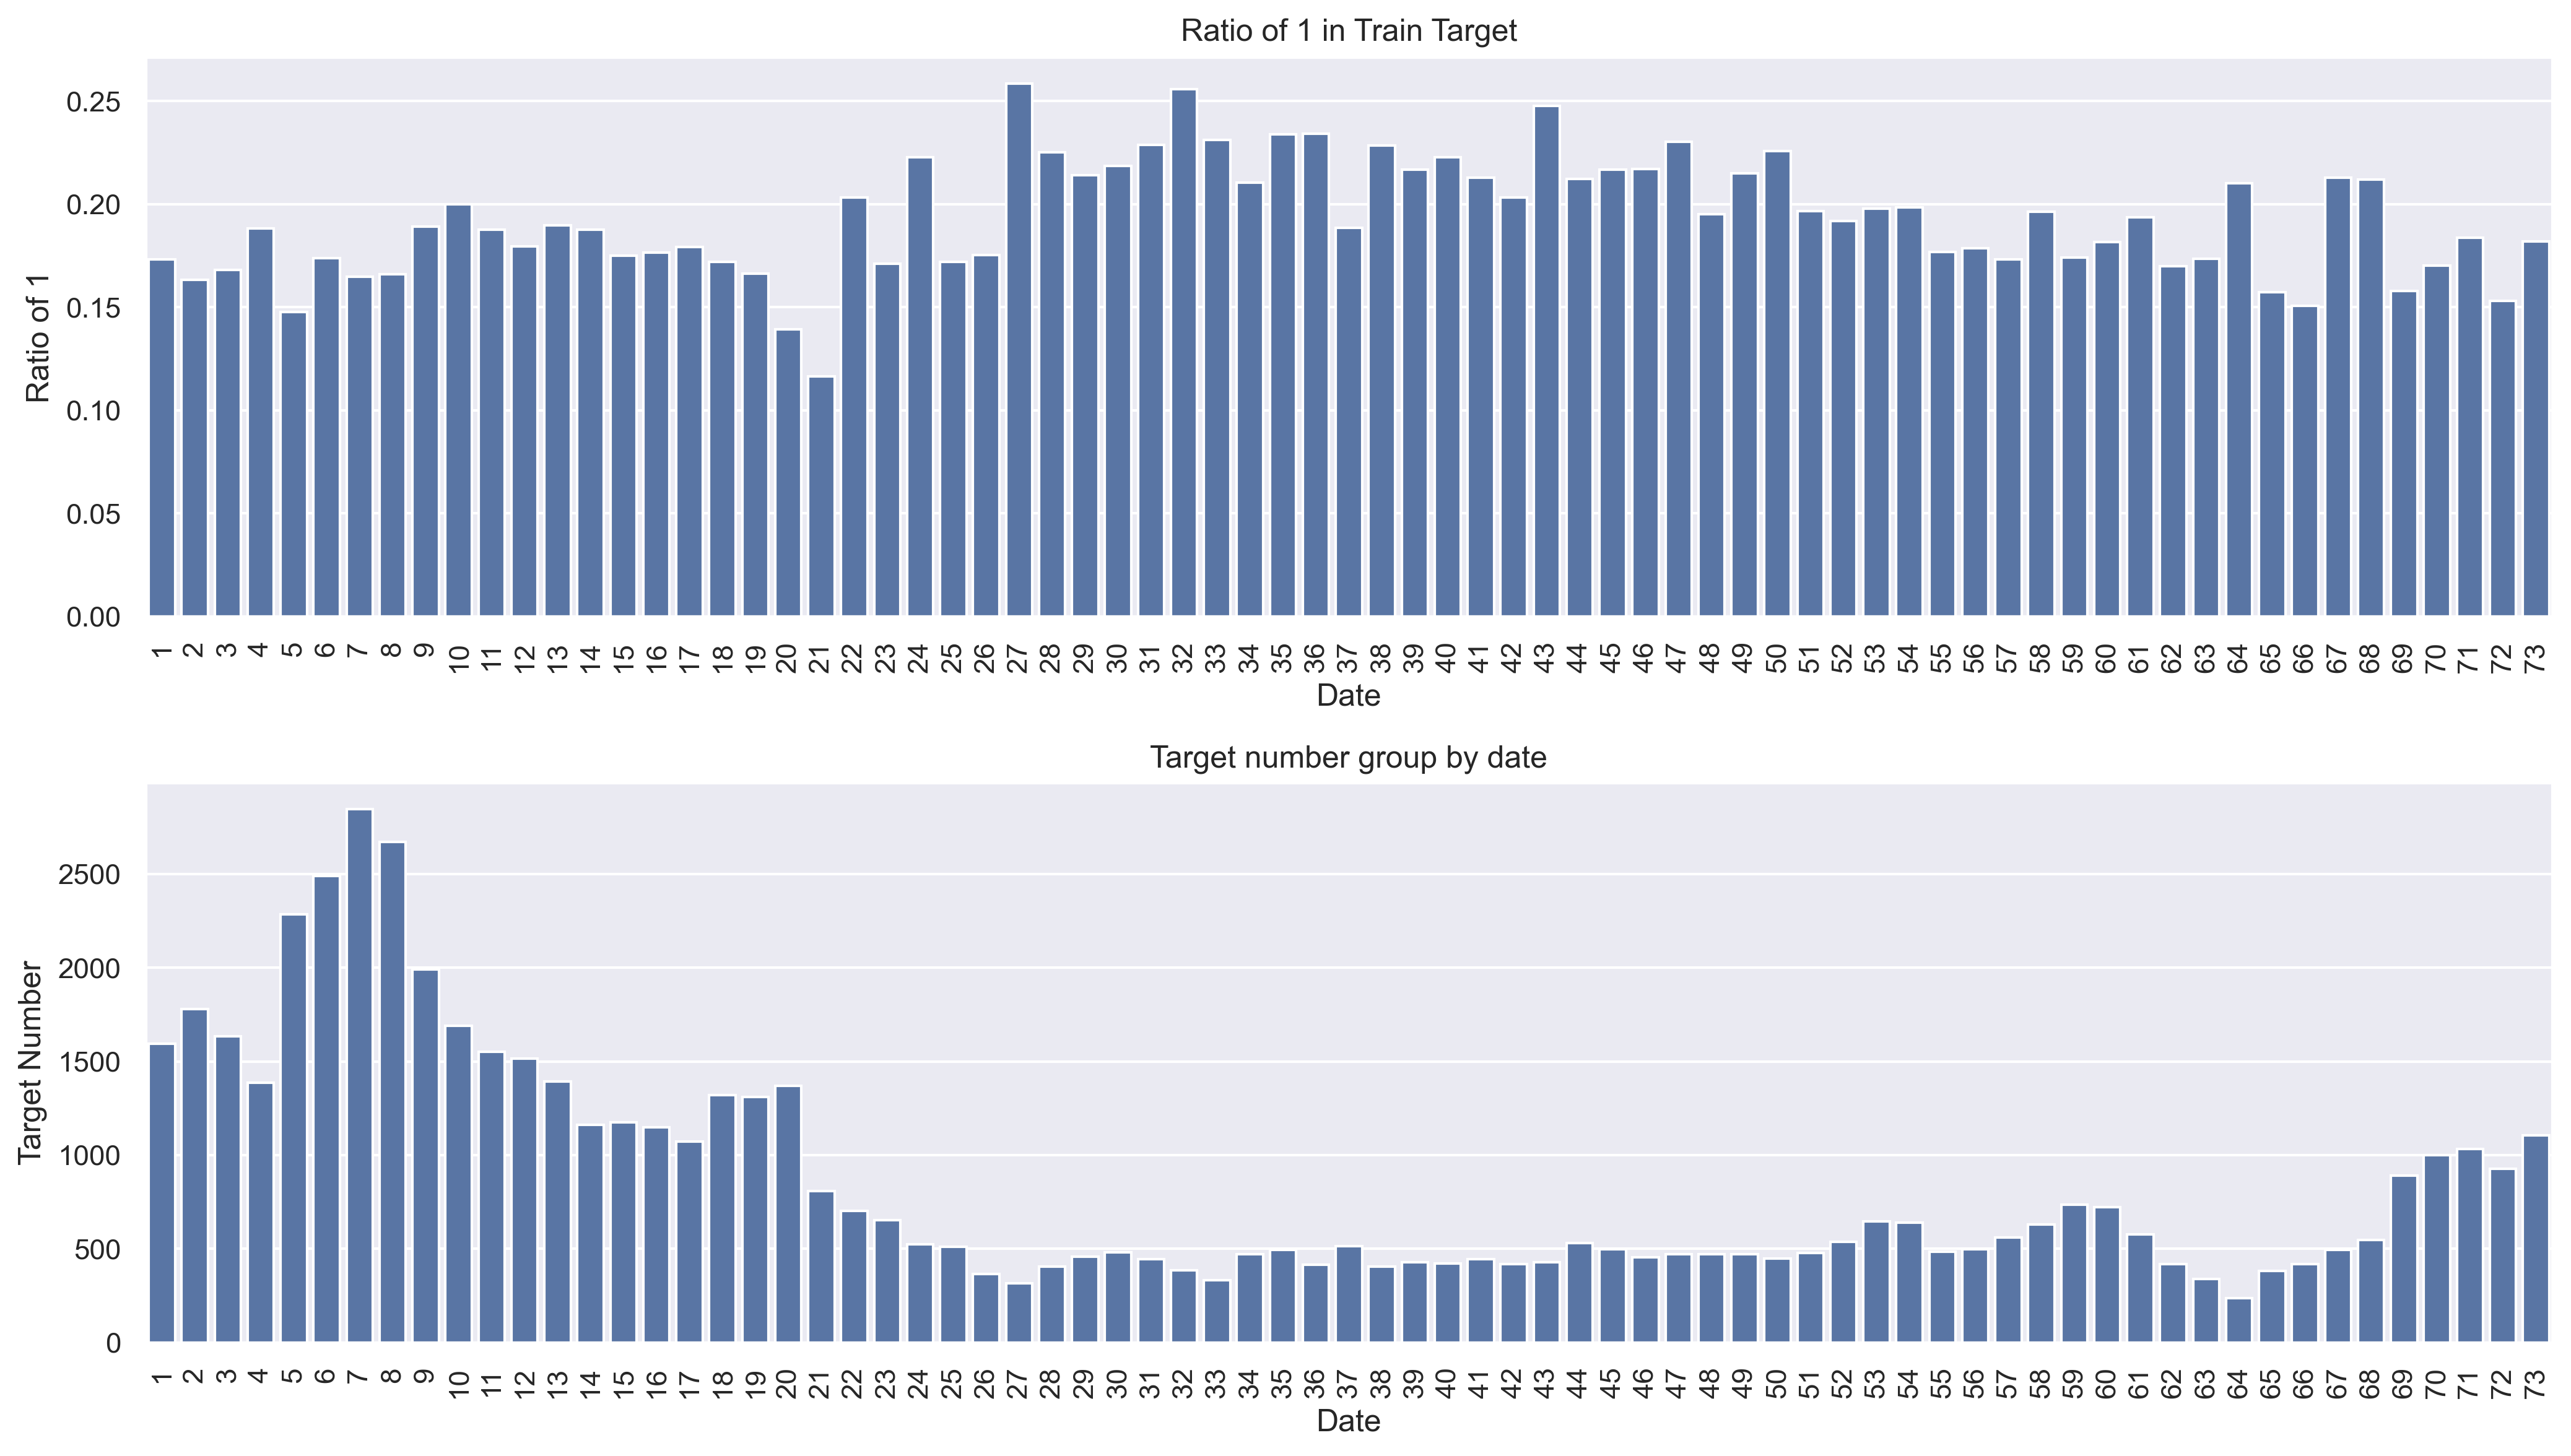

In [72]:
# 统计不同date对应的0,1的占比
date_uni = train_target.date.unique()
date_target_ratio = pd.DataFrame(columns=['date', 'ratio1', 'ratio0', 'target_number'])
temp = []
for date in date_uni:
    df_date = train_target[train_target.date == date]
    ratio1 = df_date.y.sum() / len(df_date)
    ratio0 = 1 - ratio1
    traget_number = len(df_date)
    temp.append([date, ratio1, ratio0, traget_number])
date_target_ratio = pd.DataFrame(temp, columns=['date', 'ratio1', 'ratio0', 'target_number'])

# 绘制柱状图
plt.figure(figsize=(14, 8), dpi=300)

plt.subplot(2, 1, 1)
sns.barplot(x='date', y='ratio1', data=date_target_ratio)
plt.title('Ratio of 1 in Train Target')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Ratio of 1')
plt.tight_layout()

plt.subplot(2, 1, 2)
sns.barplot(x='date', y='target_number', data=date_target_ratio)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Target Number')
plt.title('Target number group by date')
plt.tight_layout()

plt.show()

#### 相关性

In [10]:
# corrwith 方法计算的是 皮尔森相关性（Pearson correlation）与 斯皮尔曼等级相关性（Spearman rank correlation）之间的混合相关性
# g1特征与target相关性计算
corr1 = train_data[feature_groups[0]].corrwith(train_target.y)
# g2特征与target相关性计算
corr2 = train_data[feature_groups[1]].corrwith(train_target.y)
# g3特征与target相关性计算
corr3 = train_data[feature_groups[2]].corrwith(train_target.y)

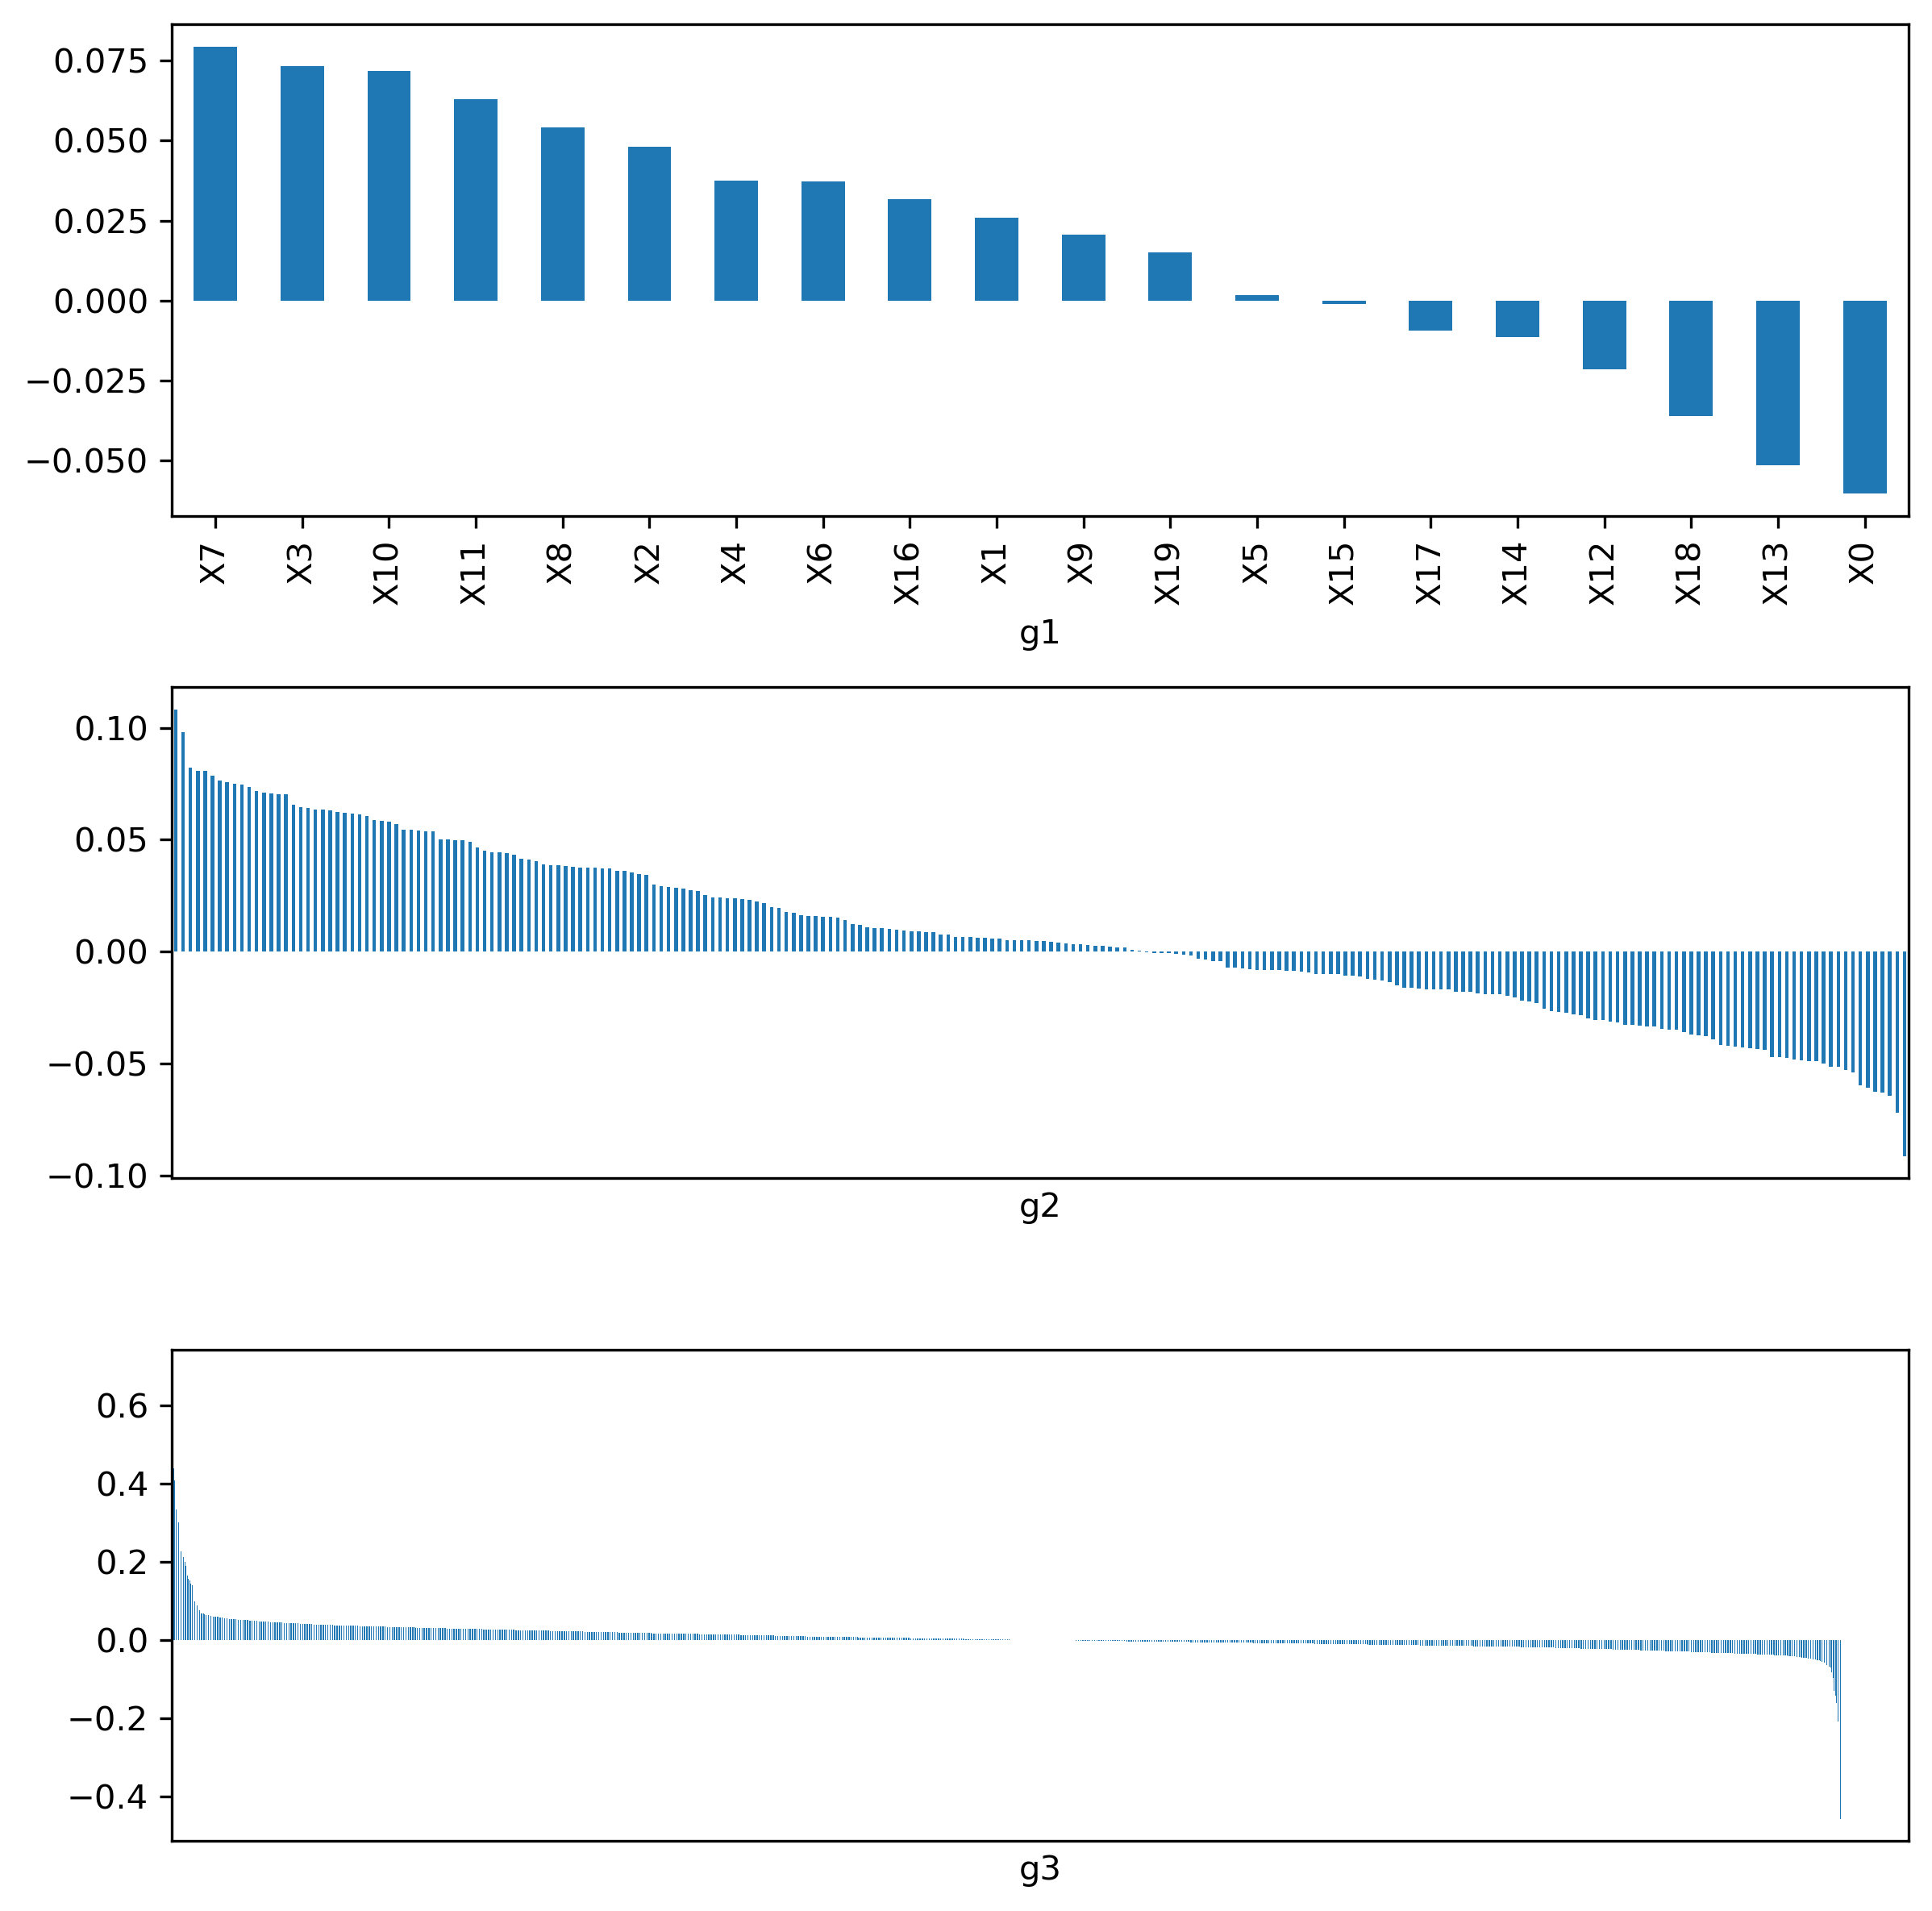

In [23]:
plt.figure(figsize=(8, 8), dpi=300)
plt.subplot(3, 1, 1)
corr1.sort_values(ascending=False).plot(kind='bar', xlabel='g1')

plt.subplot(3, 1, 2)
corr2.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='g2') 

plt.subplot(3, 1, 3)
corr3.sort_values(ascending=False).plot(kind='bar', xticks=[], xlabel='g3')

plt.tight_layout()
plt.savefig('./imgs/corr.png')
plt.show()

#### 特征选择

剔除缺失值过高的特征

In [72]:
drop_features_g1 = missing_ratio_g1[missing_ratio_g1 > 0.5]
drop_features_g2 = missing_ratio_g2[missing_ratio_g2 > 0.5]
drop_features_g3 = missing_ratio_g3[missing_ratio_g3 > 0.5]
# 从剔除的特征中保留相关性较高的特征
# 记录被重新保留的特征
saved_features_g1 = []
saved_features_g2 = []
saved_features_g3 = []
q3 = np.percentile(corr1, 75), np.percentile(corr2, 75), np.percentile(corr3.dropna(), 80)
for i in drop_features_g1.index:
    if corr2[i] >= q3[0]:
        drop_features_g1 = drop_features_g1.drop(i)
        saved_features_g1.append((i,corr2[i]))

for i in drop_features_g2.index:
    if corr2[i] >= q3[1]:
        drop_features_g2 = drop_features_g2.drop(i)
        saved_features_g2.append((i,corr2[i]))

for i in drop_features_g3.index:
    if corr3[i] >= q3[2] and corr3[i]!= np.nan:
        drop_features_g3 = drop_features_g3.drop(i)
        saved_features_g3.append((i,corr3[i]))

# 三组特征的丢弃比例与丢弃特征名称
print(q3)
print(f'g1丢弃比例：{len(drop_features_g1.index)}/{len(feature_groups[0])}')
print(f'g2丢弃比例：{len(drop_features_g2.index)}/{len(feature_groups[1])}')
print(f'g3丢弃比例：{len(drop_features_g3.index)}/{len(feature_groups[2])}')
print(saved_features_g1, '\n', saved_features_g2, '\n', saved_features_g3)
# 计算重新纳入特征的比例
print(f'g1重新纳入/丢弃：{len(saved_features_g1)}/{len(drop_features_g1)}')
print(f'g2重新纳入/丢弃：{len(saved_features_g2)}/{len(drop_features_g2)}')
print(f'g3重新纳入/丢弃：{len(saved_features_g3)}/{len(drop_features_g3)}')
# 最终保留特征占比
print()
print(f'g1最终保留比例：{len(feature_groups[0])-len(drop_features_g1)+len(saved_features_g1)}/{len(feature_groups[0])}')
print(f'g2最终保留比例：{len(feature_groups[1])-len(drop_features_g2)+len(saved_features_g2)}/{len(feature_groups[1])}')
print(f'g3最终保留比例：{len(feature_groups[2])-len(drop_features_g3)+len(saved_features_g3)}/{len(feature_groups[2])}')

(0.04963812273764458, 0.03723282550563678, 0.02643565054655039)
g1丢弃比例：3/20
g2丢弃比例：19/236
g3丢弃比例：1899/3550
[('X3', 0.07332130169388969)] 
 [('X146', 0.09788410985190386), ('X141', 0.076388961128056), ('X127', 0.037550581756626344), ('X157', 0.04047422185145275), ('X145', 0.03759788392500064), ('X175', 0.041659364097351506), ('X118', 0.05883249599273473), ('X139', 0.03824967807531801)] 
 [('X3592', 0.5703518254720302), ('X3624', 0.3333333333333334), ('X664', 0.408248290463863), ('X3603', 0.6852482888641928), ('X665', 0.052027715857262555), ('X2641', 0.21821789023599242), ('X2640', 0.21821789023599242), ('X2642', 0.21821789023599242), ('X3614', 0.4395501308811567), ('X3612', 0.09521753968356396), ('X2650', 0.2277100170213244), ('X2651', 0.2277100170213244), ('X1213', 0.063983150041353), ('X2652', 0.2277100170213244), ('X3586', 0.09923961272046179), ('X688', 0.45643546458763856), ('X3589', 0.15735776513141703), ('X2659', 0.3012436913118928), ('X2658', 0.3012436913118928), ('X2657', 0.3012

方差检验与递归特征消除

In [95]:
from scipy.stats import kruskal
def kruskal_feature_selection(train_data, train_target, k=10):
    """
    使用Kruskal-Wallis H检验进行特征选择

    参数：
        train_data (pd.DataFrame)：训练数据
        train_target (pd.Series)：训练目标变量
        k (int)：选择的特征数量

    返回：
        selected_features (list)：选择的特征列表
    """
    # 筛选显著差异的特征组
    significant_groups = []
    for feature in train_data.columns:
        h_stat, p_val = kruskal(train_data[feature], train_target)
        if p_val < 0.05:
            significant_groups.append((feature, h_stat))

    # 计算特征的重要性
    importance = [h_stat for _, h_stat in significant_groups]

    # 排序特征组
    sorted_groups = sorted(significant_groups, key=lambda x: x[1], reverse=True)

    # 选择最重要的特征组
    selected_features = [feature for feature, _ in sorted_groups[:k]]

    return selected_features

In [118]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def rfecv_feature_selection(X, y, estimator=LogisticRegression(), step=1, cv=5):
    """
    使用 RFECV 进行特征选择

    参数：
        X (pd.DataFrame)：特征数据
        y (pd.Series)：目标变量
        estimator (object)：模型对象，默认为 LogisticRegression
        step (int)：每次删除的特征数量，默认为 1
        cv (int)：交叉验证的折数，默认为 5

    返回：
        features (list)：选择的特征列表
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    selector = RFECV(estimator, step=step, cv=cv, n_jobs=-1)
    selector.fit(X_train, y_train)
    support = selector.support_
    features = X.columns[support]
    return features

In [121]:
# 选取特征组
# 特征组1
corr1_filtered = corr1[abs(corr1)>=0.02]
selected_g1_f1 = kruskal_feature_selection(train_data[corr1_filtered.index.tolist()], train_target['y'], k=round(len(corr1_filtered)*0.8))
selected_g1_f2 = rfecv_feature_selection(train_data[corr1_filtered.index.tolist()].fillna(train_data[corr1_filtered.index.tolist()].median()), train_target['y'])
print(selected_g1_f1)
print(selected_g1_f2)

['X0', 'X7', 'X10', 'X8']
Index(['X3', 'X7', 'X8', 'X10'], dtype='object')


In [119]:
# 特征组2
corr2_filtered = corr2[(abs)>=0.02]
selected_g2_f1 = kruskal_feature_selection(train_data[corr2_filtered.index.tolist()], train_target['y'], k=round(len(corr2_filtered)*0.8))
selected_g2_f2 = rfecv_feature_selection(train_data[corr2_filtered.index.tolist()].fillna(train_data[corr2_filtered.index.tolist()].median()), train_target['y'])
print(selected_g2_f1)
print(selected_g2_f2)

['X29', 'X125', 'X196', 'X65', 'X87', 'X149', 'X36', 'X67', 'X130', 'X142', 'X134', 'X20', 'X137', 'X178', 'X105', 'X64', 'X144', 'X113', 'X25', 'X35', 'X155']
Index(['X20', 'X25', 'X35', 'X36', 'X40', 'X49', 'X64', 'X68', 'X70', 'X71',
       'X87', 'X89', 'X105', 'X107', 'X111', 'X113', 'X120', 'X121', 'X128',
       'X130', 'X134', 'X137', 'X139', 'X142', 'X146', 'X149', 'X153', 'X157',
       'X163', 'X165', 'X196', 'X232', 'X235', 'X236', 'X237', 'X238', 'X239',
       'X243', 'X244', 'X245', 'X248', 'X250', 'X251', 'X253', 'X255'],
      dtype='object')


In [ ]:
# 特征组3(全部被丢弃，失去参考意义)
corr3_filtered = corr3[abs(corr3)>=0.08]
selected_g3_f1 = kruskal_feature_selection(train_data[corr3_filtered.index.tolist()], train_target['y'], k=round(len(corr3_filtered)*0.8))
print(selected_g3_f1)
selected_g3_f2 = rfecv_feature_selection(train_data[corr3_filtered.index.tolist()].fillna(train_data[corr3_filtered.index.tolist()].median()), train_target['y'])
print(selected_g3_f2)
# 考虑对特征组3直接使用嵌入模型/PCA进行降维

[]


PCA降维

#### 构建模型